#### Made this notebook when I was plotting RSM data for maddys paper. The data was an excel sheet with columns qx,qz, intensity of omego2theta scans. I also plot the log of intensity to so the plot better.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [ ]:
df = pd.read_excel('rsm_qxqz-6.45<qz<7.2.xlsx')
qx = df['qx']
qz = df['qz']
intensity = df['intensity']
log_int = np.log10(df['intensity']+1)

In [ ]:
data_head = df.head()

In [ ]:
data_head

,qz,qx,intensity
0,6.450036,5.168373,1.000000
1,6.450036,5.172044,0.500000
2,6.450036,5.175714,0.166667
3,6.450036,5.179385,0.500000
4,6.450036,5.183056,0.500000


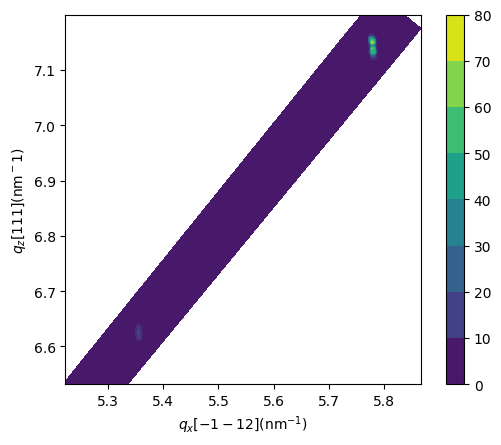

In [ ]:
fig, ax = plt.subplots(nrows=1)

# contoure
ax.tricontour(qx, qz, intensity)
# filling
cntr2 = ax.tricontourf(qx, qz, intensity)
# colorbar
fig.colorbar(cntr2, ax=ax)

plt.plot()

#plt.axhline(y = 7.151, color = 'r', linestyle = '-')
#plt.axhline(y = 6.630, color = 'r', linestyle = '-')
#plt.axvline(x =  5.358, color = 'r', linestyle = '-')
#plt.axvline(x = 5.779, color = 'r', linestyle = '-')

plt.xlabel(r"$q_x [-1-12] (\mathrm{nm}^{-1})$")
plt.ylabel(r"$q_z [111] (\mathrm{nm}^-1)$")

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

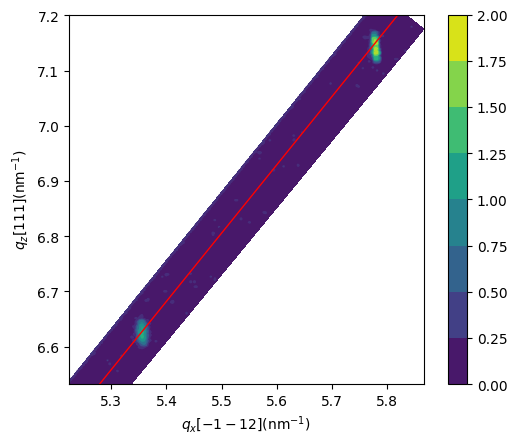

In [ ]:
fig, ax = plt.subplots(nrows=1)


ax.tricontour(qx, qz, log_int)

cntr2 = ax.tricontourf(qx, qz, log_int)

fig.colorbar(cntr2, ax=ax)

plt.plot()
plt.xlabel(r"$q_x [-1-12] (\mathrm{nm}^{-1})$")
plt.ylabel(r"$q_z [111] (\mathrm{nm}^{-1})$")

#relaxation lines
plt.axline([5.779, 7.151], [5.358, 6.630],color = 'r', lw = 1)
#plt.axhline(y = 7.151, color = 'r', linestyle = '-')
#plt.axhline(y = 6.630, color = 'r', linestyle = '-')
#plt.axvline(x =  5.358, color = 'r', linestyle = '-')
#plt.axvline(x = 5.779, color = 'r', linestyle = '-')

plt.gca().set_aspect('equal', adjustable='box')


plt.show()


In [ ]:
df = pd.read_excel('rsm_qxqz-gasb.xlsx')

qx = df['qx']
qz = df['qz']
intensity = df['intensity']
log_int = np.log10(df['intensity']+1)

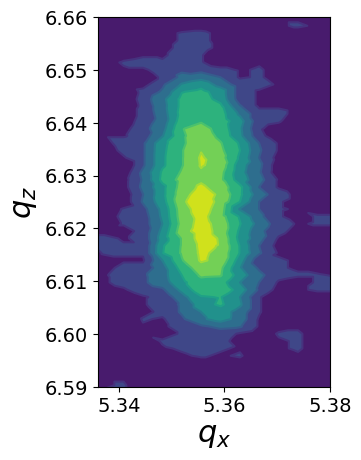

In [ ]:
fig, ax = plt.subplots(nrows=1)

# contoure
ax.tricontour(qx, qz, log_int)
ax.set_xlim(5.336, 5.38)
ax.set_ylim(6.59, 6.66)
# filling
cntr2 = ax.tricontourf(qx, qz, log_int)
# colorbar
#fig.colorbar(cntr2, ax=ax)
# dots
plt.plot()
plt.xlabel(r"$q_x$", fontsize = 22)
plt.ylabel(r"$q_z$",fontsize = 22)
plt.tick_params(labelsize=14)
#relaxation lines
#plt.axhline(y = 6.630, color = 'r', linestyle = '-')
#plt.axvline(x =  5.358, color = 'r', linestyle = '-')

plt.gca().set_aspect('equal', adjustable='box')
# plt.clim(0.13,0.4)

plt.show()


In [ ]:
fig.savefig('RSM-LOG10-relaxation-line.png', dpi=350, bbox_inches="tight")

### below is some code that Ryn wrote for some RSM purpose in the past. I haven't discected what it does but I will leave it at the end in case it might come in handy later

In [ ]:
#x    : omega
#y    : 2theta
#z    : intensity
#zlog : the log of z. Essentially makes smaller values more noticable in the plot

#x & y are both arrays
#z is a matrix with the number of rows=length of y, and the number of columns=length of x

#v------- Inputs -------v

#filepath is the name of the file and any folder it is in.
#Make sure this code is within the same folder as your txt data file.
#Essential, filepath tells the code where to look with the starting point being wherever you have this code located.

filepath =  'rsm.txt' #'M511 rsm FINAL 111.txt'

step_y = True   #If True, specify your start and end of y. If False, will use 2theta given in data for y
y_start = -1
y_end = 1

#------------------------------------------------------------------------------------------------
g = open(filepath, 'r')
f = open(filepath, 'r')

y=[]
x=[]
z=[]
dz=[]
zlog=[]
dzlog=[]
start=[0,0]
stpsize=1
l = 1
count = 0
dd = 0
cc = 0
begin = 100

for thing in g:
    if len(thing.split()) > 1:
        if thing.split()[0]=='_START':
            start.append(float(thing.split()[2]))
        if thing.split()[0]=='_STEPSIZE':
            stpsize = float(thing.split()[2])
        if thing.split()[1]=='Data':
            l+=1

n=int(round((start[-2]-start[-3])/stpsize,2))+1
dy = (y_end-y_start)/l

for inte in f:
    if count < begin:
        count+=1
        if inte.split()[0]=='_V4_INF_SITE':
            begin=count
    else:
        count+=1
        if len(inte.split()) > 1:
            if inte.split()[1]=='Data':
                dd = count + 49

                cc+=1
                if step_y == True:
                    y_start+=dy
                    y.append(y_start)
                if cc == 1:
                    dz=[]
                    i=1
                    h=l
                else:
                    if none_values==True:
                        while h > cc:
                            for m in range(n-1):
                                dz.append(None)
                                dzlog.append(None)
                            h-=1

                    z.append(dz)
                    zlog.append(dzlog)
                    dz=[]
                    dzlog=[]
                    i=1
                    h=l
            else:
                if step_y == False:
                    if inte.split()[0]=='_2THETA':
                        y.append(float(inte.split()[2]))

                if inte.split()[1]=='THETA':
                    dd = count

                if count > dd:
                    if cc == (h-1):
                        x.append(float(inte.split()[0]))
                    elif count >= dd+1 and count<dd+n:
                            x.append(float(inte.split()[0]))

                    while i < cc:
                        for m in range(n-1):
                            dz.append(None)
                            dzlog.append(None)
                        i+=1

                    dz.append(float(inte.split()[1]))
                    dzlog.append(np.log(float(inte.split()[1])))

z.append(dz)
zlog.append(dzlog)

print('Length of x: ',len(x))
print('Length of y: ',len(y))
print('Number of Columns in z: ',len(z[-3]))
print('Number of Rows in z: ',len(z))

u=[]
for f in z:
    for j in f:
        if j != None:
            u.append(j)
print('Max Intensity: ',max(u))

In [ ]:
XXn, YYn = np.meshgrid(x, y, indexing='xy')
ZZn = z #or zlog


figure(figsize=(12, 8), dpi=80)

plt.contourf(XXn, YYn, ZZn, levels=50, cmap='jet')
plt.colorbar()
plt.title('2Theta vs Omega')
plt.xlabel('Omega')
plt.ylabel('2Theta')
#plt.ylim(45,55)
#plt.xlim(11.8,12.2)
#plt.savefig('RSM 2theta-omega w log.png')
plt.show()

In [ ]:
Qx=K[cos("Theta"-w)-cos("Theta"+w)]


Qz=K[sin("Theta"-w)+sin("Theta"+w)]


where K=2pi/"lambda"

qz = delta_theta * cos(theta)/lambda

qy = (2* delta_w - delta_theta) sin(theta)/lambda

qz = (1/lambda)(dW cos(W) + (dtheta - dW) cos(phi-W)

qy = (1/lambda)(dW sin(W) + (dtheta - dW) sin(phi-W)

Q_x = 2pi/lambda ( cos(W) - cos(2Theta - W))

Q_z = 2pi/lambda ( sin(W) + sin(2Theta - W))

                lmda = 1.54
K = (2*3.1415926)/lmda
dW = 0.5
dTheta = 0.001
phi = 0
Theta = YYn   #2theta
W     = XXn  #omega

qx = K*(np.cos(W)-np.cos(Theta-W))

#qx = (1/lmda)*((dW*np.cos(W)) + ((dTheta-dW)*np.cos(phi-W)))
print(len(qx[0]))
qz = K*(np.sin(W)+np.sin(Theta-W))

#qz = (1/lmda)*((dW*np.sin(W)) + ((dTheta-dW)*np.sin(phi-W)))
print(len(qz))

figure(figsize=(12, 8), dpi=80)

plt.contourf(qx, qz, ZZn, levels=50, cmap='jet')
plt.colorbar()
#plt.ylim(0.5,1.5)
#plt.xlim(-1.8,-0.8)
plt.title('RSM Relative 2theta')
plt.xlabel('Q_x')
plt.ylabel('Q_z')
#plt.savefig('RSM 2theta-omega Qx-Qz w log.png')
plt.show()